In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import os


In [2]:
books_col=['ISBN','BookTitle','BookAuthor','YearOfPublication','Publisher',	'ImageURLS','ImageURLM','ImageURLL']
users_col=['UserID','Location','Age']
ratings_col=['UserID','ISBN','BookRating']

In [3]:
books = pd.read_csv("C:\\Users\\AKASH SHARMA\\Desktop\\ml_projects\\Books.csv",low_memory=False)
books.columns=books_col
users=pd.read_csv("C:\\Users\\AKASH SHARMA\\Desktop\\ml_projects\\Users.csv")
users.columns=users_col
ratings=pd.read_csv("C:\\Users\\AKASH SHARMA\\Desktop\\ml_projects\\Ratings.csv")
ratings.columns=ratings_col

In [4]:
books.head(3)

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher,ImageURLS,ImageURLM,ImageURLL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [5]:
ratings.head(3)

,UserID,ISBN,BookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [6]:
users.head(3)

,UserID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN


DATA CLEANING

In [7]:
# books.shape

In [8]:
# ratings.shape

In [9]:
# users.shape

In [10]:
# missing values
books.isnull().sum()

ISBN                 0
BookTitle            0
BookAuthor           2
YearOfPublication    0
Publisher            2
ImageURLS            0
ImageURLM            0
ImageURLL            3
dtype: int64

In [11]:
books.loc[(books['BookAuthor'].isnull()),:]

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher,ImageURLS,ImageURLM,ImageURLL
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [12]:
books.loc[(books['Publisher'].isnull()),:]

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher,ImageURLS,ImageURLM,ImageURLL
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [13]:
ratings.isnull().sum()

UserID        0
ISBN          0
BookRating    0
dtype: int64

In [14]:
users.isnull().sum()

UserID           0
Location         0
Age         110762
dtype: int64

In [15]:
books.duplicated().sum


<bound method Series.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
271355    False
271356    False
271357    False
271358    False
271359    False
Length: 271360, dtype: bool>

In [16]:
users.duplicated().sum

<bound method Series.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
278853    False
278854    False
278855    False
278856    False
278857    False
Length: 278858, dtype: bool>

In [17]:
ratings.duplicated().sum

<bound method Series.sum of 0          False
1          False
2          False
3          False
4          False
           ...  
1149775    False
1149776    False
1149777    False
1149778    False
1149779    False
Length: 1149780, dtype: bool>

# books data


In [18]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ISBN               271360 non-null  object
 1   BookTitle          271360 non-null  object
 2   BookAuthor         271358 non-null  object
 3   YearOfPublication  271360 non-null  object
 4   Publisher          271358 non-null  object
 5   ImageURLS          271360 non-null  object
 6   ImageURLM          271360 non-null  object
 7   ImageURLL          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [19]:
# drop image url
books.drop(['ImageURLS', 'ImageURLL'],axis=1,inplace=True)

In [20]:
books.YearOfPublication.unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', '1955', '1946', '1936',
       '1930', '2011', '1925', '1948', '1943', '1947', '1945', '1923',
       '2020', '1939', '1926', '1938', '2030', '1911', '1904', '1949',
       '1932', '1928', '1929', '1927', '1931', '1914', '2050', '1934',
       '1910', '1933', '1902', '1924', '1921', '1900', '2038', '2026',
       '1944', '1917', '1901', '2010', '1908', '1906', '1935', '1806',
       '2021', '2012', '2006', 'DK Publishing Inc', 'Gallimard', '1909',
       

In [21]:
# books.BookTitle.unique()

In [22]:
# books.BookAuthor.unique()

In [23]:
# books.Publisher.unique()

In [24]:
# books.ISBN.unique()

In [25]:
books.loc[books.YearOfPublication=='DK Publishing Inc',:]

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher,ImageURLM
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...


In [26]:
books.loc[books.YearOfPublication=='Gallimard',:]

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher,ImageURLM
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...


In [27]:
# make some corrections for Gallimard And DK publishing

In [28]:
books.loc[209538]

ISBN                                                        078946697X
BookTitle            DK Readers: Creating the X-Men, How It All Beg...
BookAuthor                                                        2000
YearOfPublication                                    DK Publishing Inc
Publisher            http://images.amazon.com/images/P/078946697X.0...
ImageURLM            http://images.amazon.com/images/P/078946697X.0...
Name: 209538, dtype: object

In [29]:
books.loc[221678]

ISBN                                                        0789466953
BookTitle            DK Readers: Creating the X-Men, How Comic Book...
BookAuthor                                                        2000
YearOfPublication                                    DK Publishing Inc
Publisher            http://images.amazon.com/images/P/0789466953.0...
ImageURLM            http://images.amazon.com/images/P/0789466953.0...
Name: 221678, dtype: object

In [30]:
books.loc[220731]

ISBN                                                        2070426769
BookTitle            Peuple du ciel, suivi de 'Les Bergers\";Jean-M...
BookAuthor                                                        2003
YearOfPublication                                            Gallimard
Publisher            http://images.amazon.com/images/P/2070426769.0...
ImageURLM            http://images.amazon.com/images/P/2070426769.0...
Name: 220731, dtype: object

In [31]:
# books.head()

In [32]:
# for replacing values:
# 209538
books.at[209538,'Publisher']='DK Publishing Inc'
books.at[209538,'YearOfPublication']=2000
books.at[209538,'BookAuthor']='Michael Teitelbaum'
books.at[209538,'BookTitle']='DK Readers: Creating the X-Men, How It All Beg...'

# 221678
books.at[221678,'Publisher']='DK Publishing Inc'
books.at[221678,'YearOfPublication']=2000
books.at[221678,'BookAuthor']='James Buckley'
books.at[221678,'BookTitle']=' DK Readers: Creating the X-Men, How Comic Book... '

# 220731
books.at[220731,'Publisher']='Gallimard'
books.at[220731,'YearOfPublication']=2003
books.at[220731,'BookAuthor']='Jean-Marie Gustave Le '
books.at[220731,'BookTitle']='Peuple du ciel, suivi de Les Bergers'

In [33]:
df=pd.DataFrame(books)

# users data

In [34]:
users.shape

(278858, 3)

In [35]:
users.head()

,UserID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [36]:
users['Age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [37]:
# replace nan values by mean age
users['Age'].fillna((users['Age'].mean()),inplace=True)

C:\Users\AKASH SHARMA\AppData\Local\Temp\ipykernel_9292\1007415662.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  users['Age'].fillna((users['Age'].mean()),inplace=True)


In [38]:
users['Age'].unique()


array([ 34.7514337,  18.       ,  17.       ,  61.       ,  26.       ,
        14.       ,  25.       ,  19.       ,  46.       ,  55.       ,
        32.       ,  24.       ,  20.       ,  34.       ,  23.       ,
        51.       ,  31.       ,  21.       ,  44.       ,  30.       ,
        57.       ,  43.       ,  37.       ,  41.       ,  54.       ,
        42.       ,  50.       ,  39.       ,  53.       ,  47.       ,
        36.       ,  28.       ,  35.       ,  13.       ,  58.       ,
        49.       ,  38.       ,  45.       ,  62.       ,  63.       ,
        27.       ,  33.       ,  29.       ,  66.       ,  40.       ,
        15.       ,  60.       ,   0.       ,  79.       ,  22.       ,
        16.       ,  65.       ,  59.       ,  48.       ,  72.       ,
        56.       ,  67.       ,   1.       ,  80.       ,  52.       ,
        69.       ,  71.       ,  73.       ,  78.       ,   9.       ,
        64.       , 103.       , 104.       ,  12.       ,  74. 

In [39]:
users.isnull().sum()

UserID      0
Location    0
Age         0
dtype: int64

In [40]:
# retreiving age between 5 to 90
users['Age'].loc[(users['Age']>90)|(users['Age']<5)]=np.nan

C:\Users\AKASH SHARMA\AppData\Local\Temp\ipykernel_9292\3294486706.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  users['Age'].loc[(users['Age']>90)|(users['Age']<5)]=np.nan
C:\Users\AKASH SHARMA\AppData\Local\Temp\ipykernel_9292\329448

In [41]:
users['Age'].fillna((users['Age'].mean()),inplace=True)

C:\Users\AKASH SHARMA\AppData\Local\Temp\ipykernel_9292\3991420478.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  users['Age'].fillna((users['Age'].mean()),inplace=True)


In [42]:
users['Age'].unique()

array([34.7514337 , 18.        , 17.        , 61.        , 26.        ,
       14.        , 25.        , 19.        , 46.        , 55.        ,
       32.        , 24.        , 20.        , 34.        , 23.        ,
       51.        , 31.        , 21.        , 44.        , 30.        ,
       57.        , 43.        , 37.        , 41.        , 54.        ,
       42.        , 50.        , 39.        , 53.        , 47.        ,
       36.        , 28.        , 35.        , 13.        , 58.        ,
       49.        , 38.        , 45.        , 62.        , 63.        ,
       27.        , 33.        , 29.        , 66.        , 40.        ,
       15.        , 60.        , 34.73485224, 79.        , 22.        ,
       16.        , 65.        , 59.        , 48.        , 72.        ,
       56.        , 67.        , 80.        , 52.        , 69.        ,
       71.        , 73.        , 78.        ,  9.        , 64.        ,
       12.        , 74.        , 75.        , 76.        , 83.  

# Rating data

In [43]:
ratings.head()

,UserID,ISBN,BookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [44]:
# ISBN that is in books data
unique_ratings=ratings[ratings.ISBN.isin(books.ISBN)]
unique_ratings

,UserID,ISBN,BookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149774,276704,0876044011,0
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10


In [45]:
ratings.shape


(1149780, 3)

In [46]:
unique_ratings.shape

(1031136, 3)

In [47]:
unique_ratings['BookRating'].unique()

array([ 0,  5,  3,  6,  7,  9,  8, 10,  1,  4,  2], dtype=int64)

# Data visualization

<Axes: title={'center': 'top 15 authors with no of books'}, xlabel='count', ylabel='BookAuthor'>

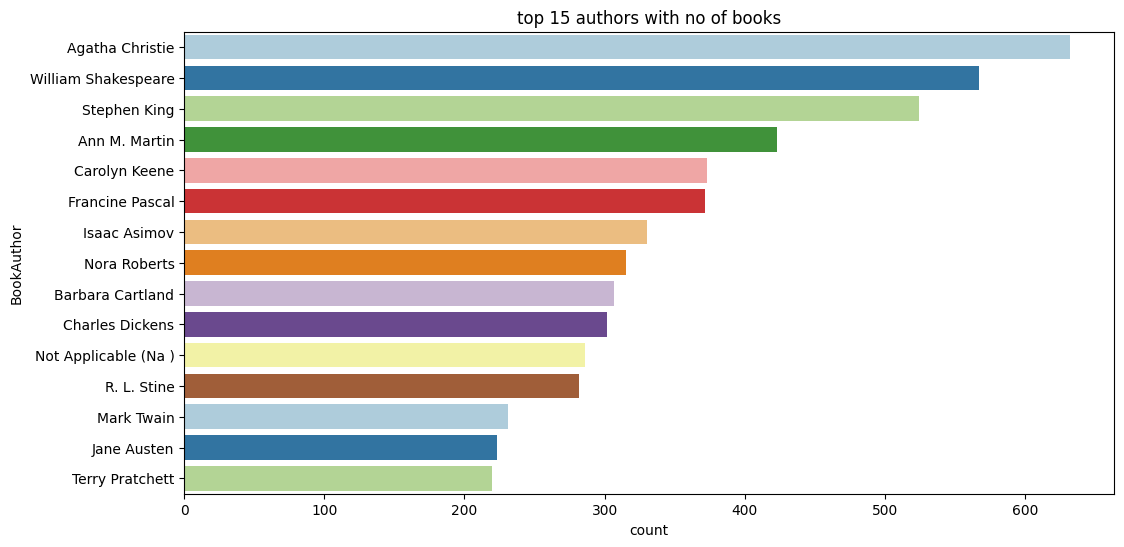

In [48]:
 #  top 15 authors with highest no of books
plt.figure(figsize=(12,6))
plt.title("top 15 authors with no of books")
sns.countplot(y="BookAuthor",palette='Paired',data=books,order=books['BookAuthor'].value_counts().index[0:15])

Text(0.5, 1.0, 'top 15 publishers with no of books')

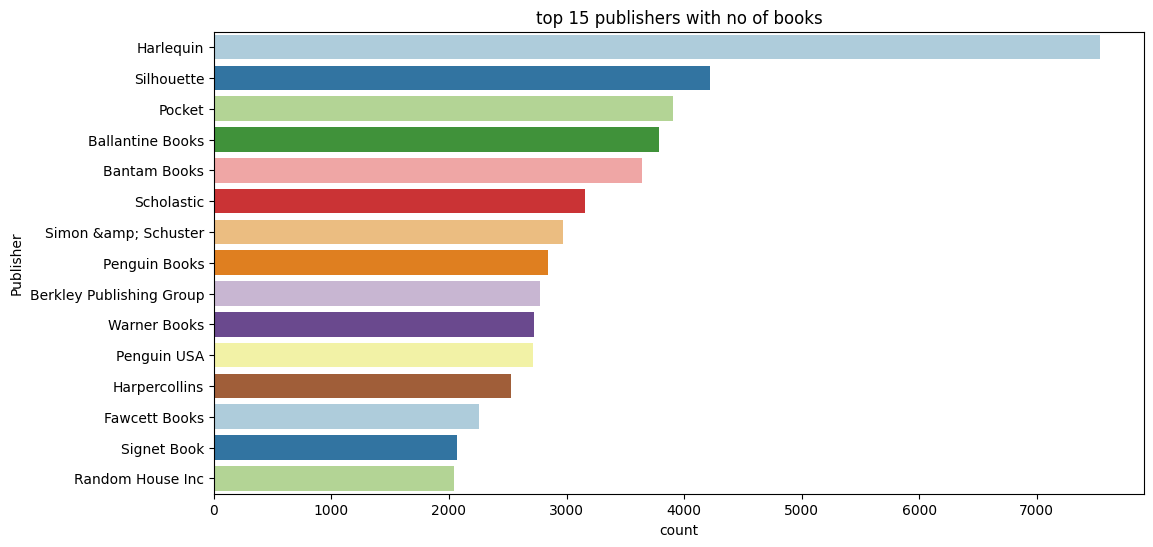

In [49]:
 #  top 15 publishers with highest no of books
plt.figure(figsize=(12,6))
sns.countplot(y="Publisher",palette='Paired',data=books,order=books['Publisher'].value_counts().index[0:15])
plt.title("top 15 publishers with no of books")

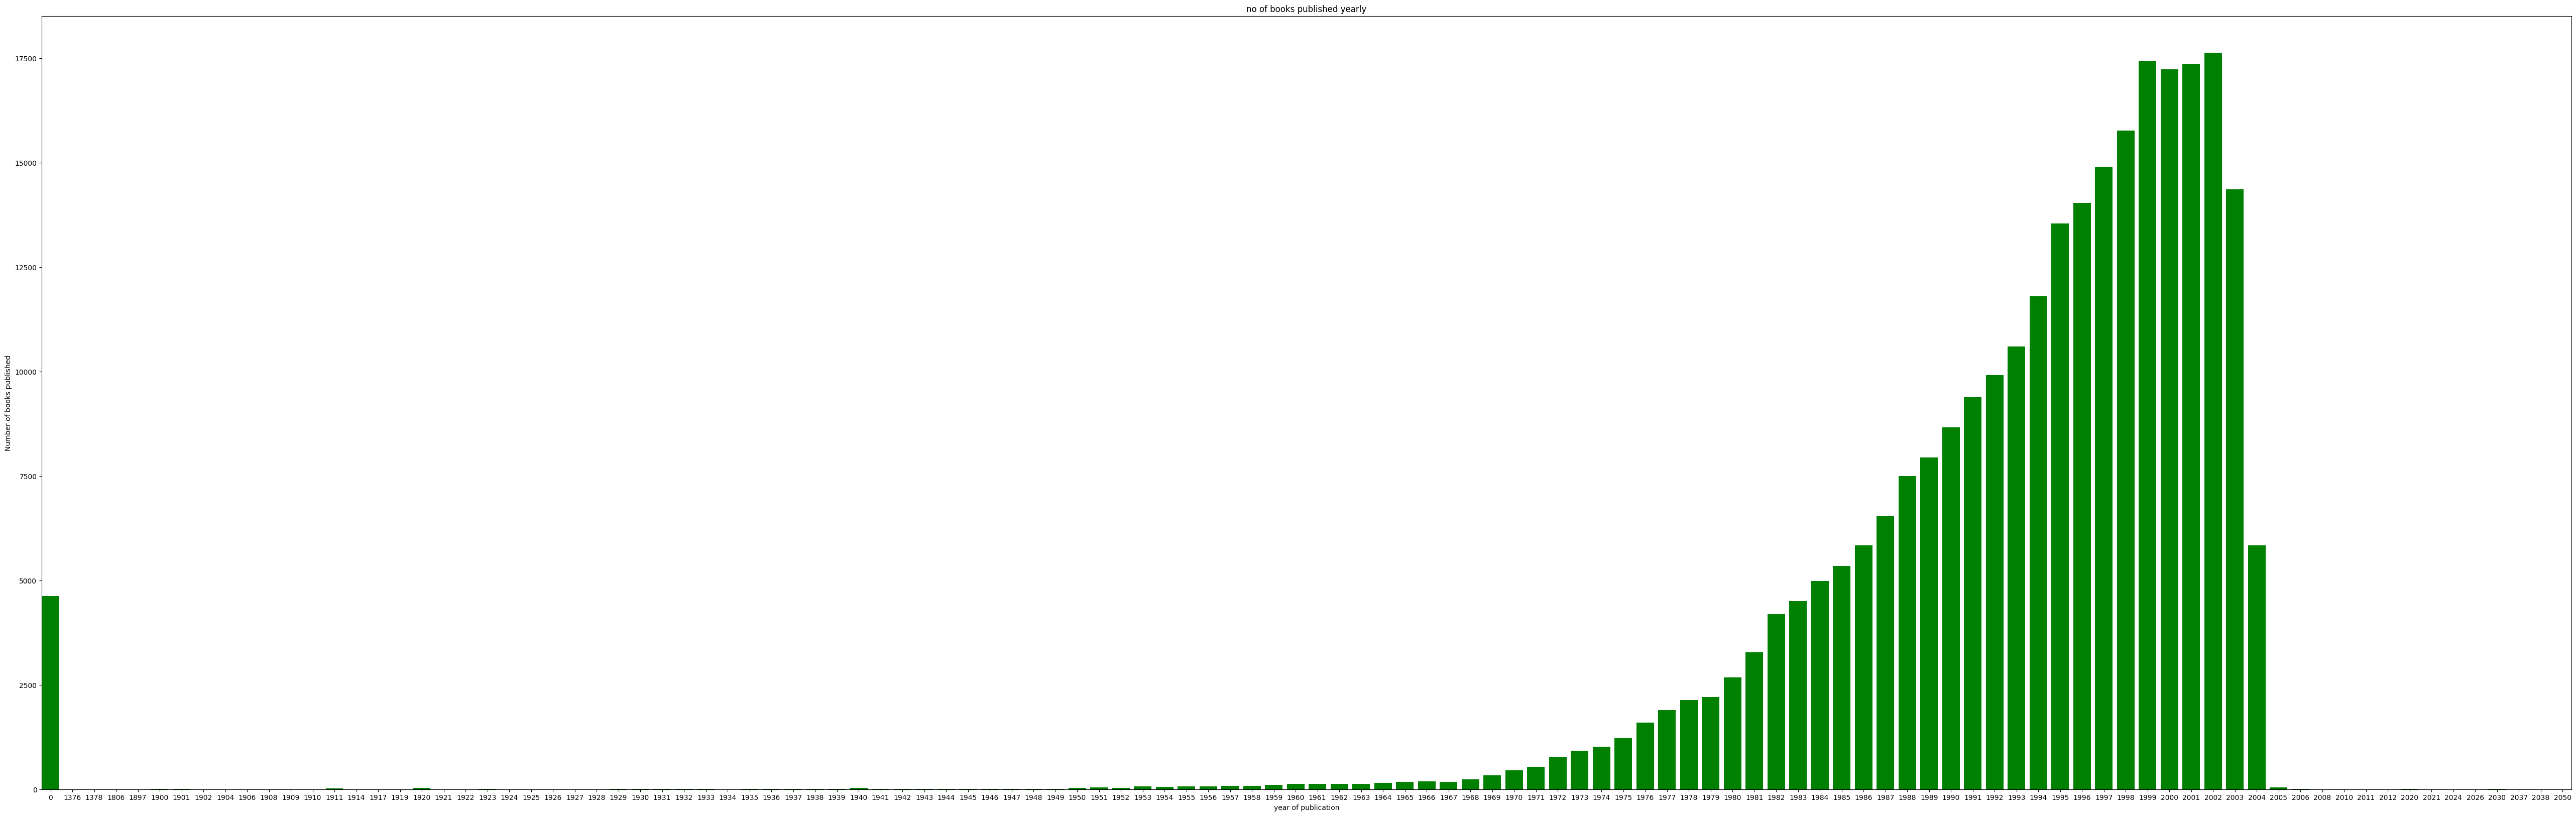

In [50]:
publications={}
for year in books["YearOfPublication"]:
    if str(year) not in publications:
        publications[str(year)]=0
    publications[str(year)]+=1    
publications ={k:v for k ,v in sorted(publications.items())}
fig=plt.figure(figsize=(65,20))
plt.bar(list(publications.keys()),list(publications.values()),color='green')
plt.ylabel("Number of books published")
plt.xlabel("year of publication")
plt.title("no of books published yearly")
plt.margins(x=0)
plt.show()

<Axes: xlabel='BookRating', ylabel='count'>

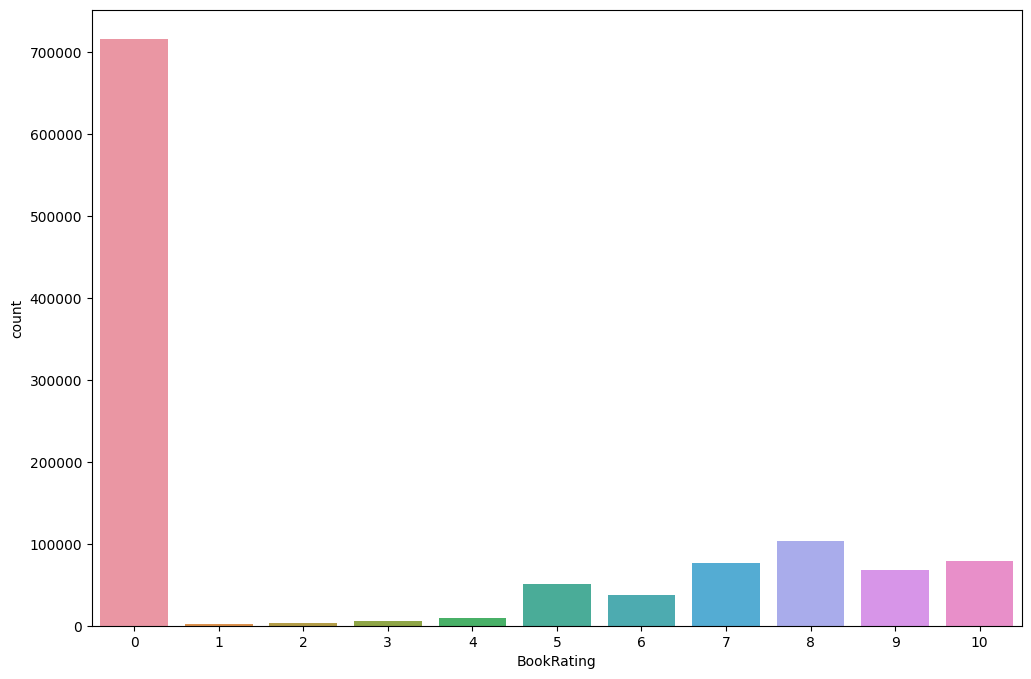

In [51]:
 plt.figure(figsize=(12,8))
sns.countplot(x='BookRating',data=ratings)

<Axes: xlabel='BookRating', ylabel='count'>

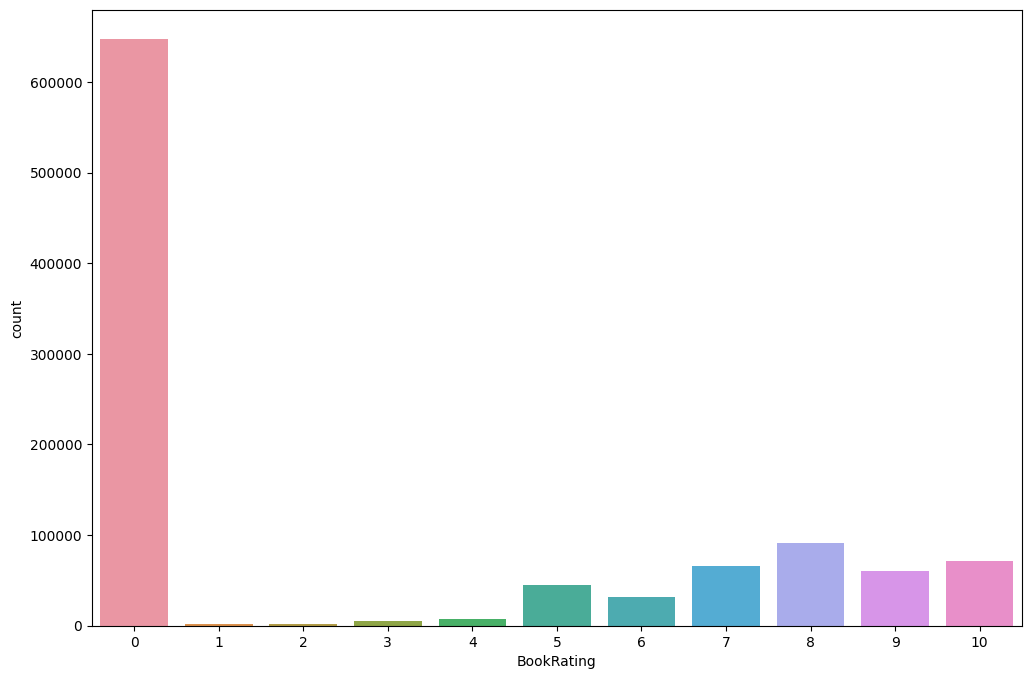

In [52]:
plt.figure(figsize=(12,8))
sns.countplot(x='BookRating',data=unique_ratings)

Text(0.5, 1.0, 'Explicit ratings')

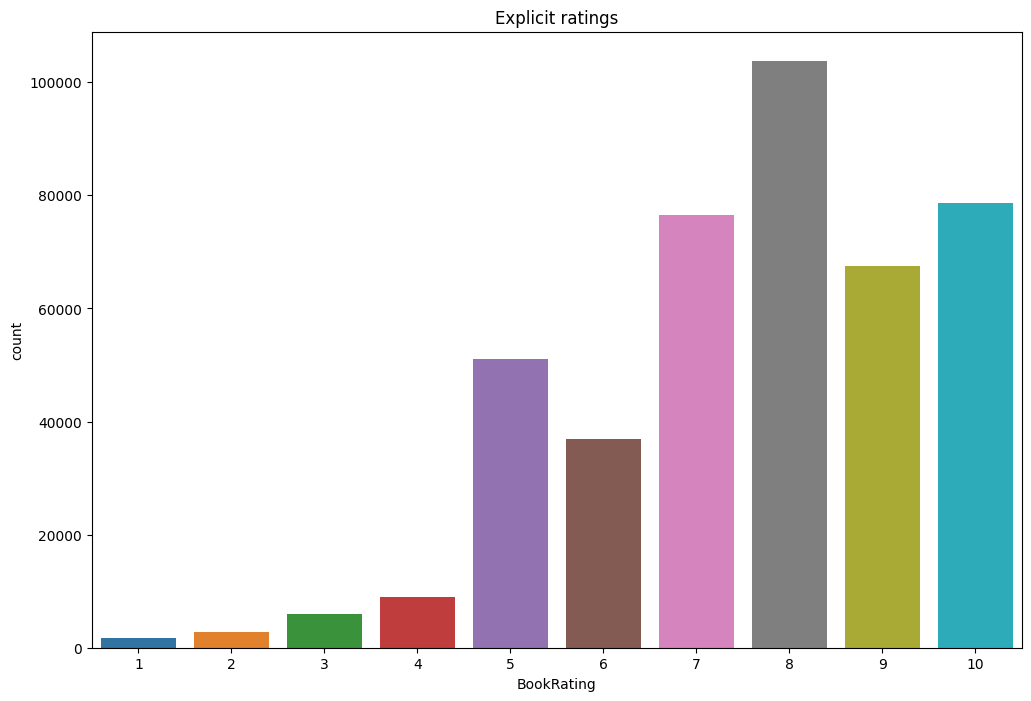

In [53]:
# explicit ratings
plt.figure(figsize=(12,8))
explicit_rating=ratings[ratings['BookRating']!=0]
sns.countplot(x='BookRating',data=explicit_rating)
plt.title("Explicit ratings")

<Axes: title={'center': 'top 15 title with no of books'}, xlabel='count', ylabel='BookTitle'>

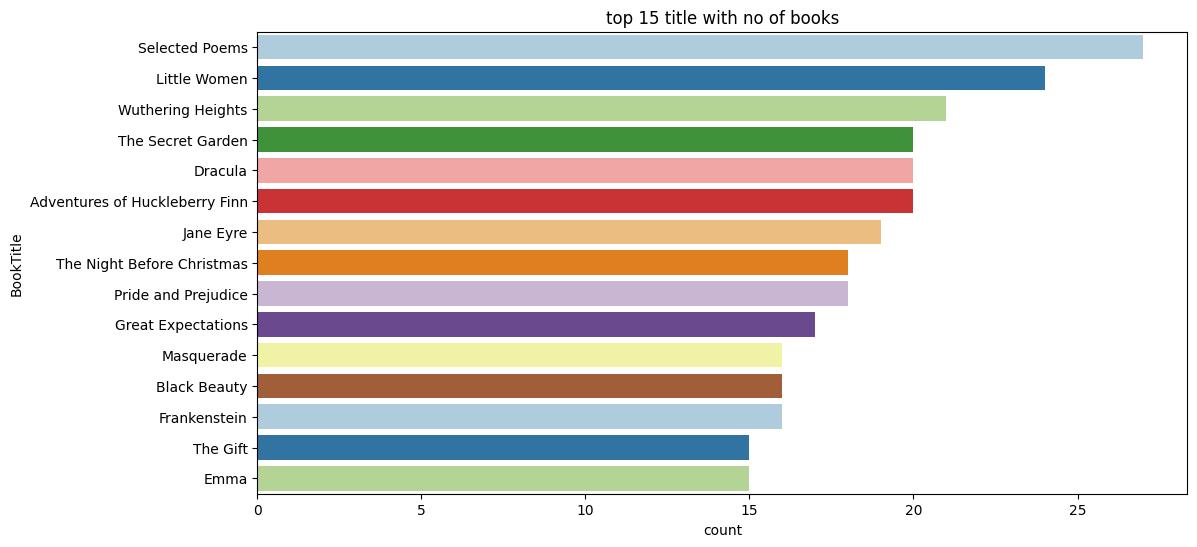

In [54]:
plt.figure(figsize=(12,6))
plt.title("top 15 title with no of books")
sns.countplot(y="BookTitle",palette='Paired',data=books,order=books['BookTitle'].value_counts().index[0:15])

<Axes: >

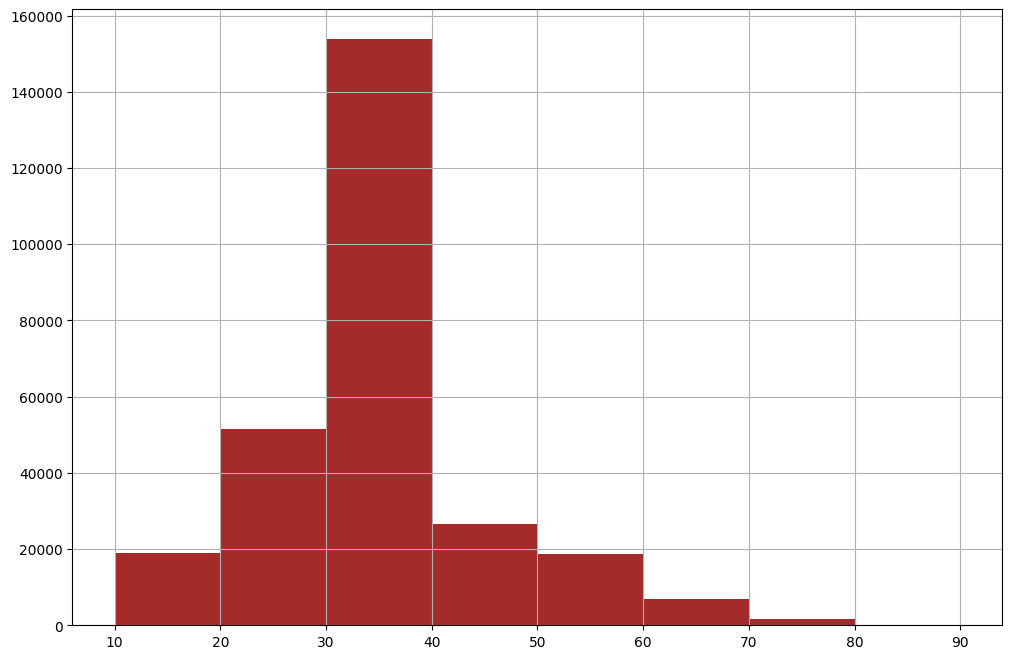

In [55]:
plt.figure(figsize=(12,8))
users.Age.hist(bins=[10*i for i in range(1,10)],color = 'brown')

# popularity based recommendation system

In [ ]:
dataset=pd.merge(books,ratings,on='ISBN')
dataset=pd.merge(dataset,users,on='UserID')
dataset.info()

In [ ]:
dataset.shape

In [ ]:
# count the no of ratings with the book title
num_rating_df=dataset.groupby("BookTitle").count()['BookRating'].reset_index()
num_rating_df.rename(columns={'BookRating':'num_ratings'},inplace=True)
num_rating_df

In [ ]:
# dataset['BookRating'] = pd.to_numeric(dataset['BookRating'], errors='coerce')
avg_rating_df=dataset.groupby("BookTitle")['BookRating'].mean().reset_index()
avg_rating_df.rename(columns={'BookRating':'avg_ratings'},inplace=True)
avg_rating_df

In [ ]:
# merge num df and avg df
popular_df=num_rating_df.merge(avg_rating_df, on='BookTitle')
popular_df

In [ ]:
# conditions for recommendation
popular_df=popular_df[popular_df['num_ratings']>=250].sort_values('avg_ratings',ascending=False).head(50)

In [ ]:
popular_df=popular_df.merge(books,on='BookTitle').drop_duplicates("BookTitle")[['BookTitle','BookAuthor','YearOfPublication','ImageURLM','num_ratings','avg_ratings']]

In [ ]:
popular_df

# collaborative filtering based recommender system

In [ ]:
# users that give ratings to minimum to 250 books
x=dataset.groupby('UserID').count()['BookRating']>=200
user_ratings=x[x].index

In [ ]:
user_ratings=dataset[dataset['UserID'].isin(user_ratings)]

In [ ]:
# books that get minimum 50 
books_ratings=user_ratings.groupby('BookTitle').count()['BookRating']>=50
famous_books=books_ratings[books_ratings].index

In [ ]:
final_ratings=user_ratings[user_ratings['BookTitle'].isin(famous_books)]

In [ ]:
grid=final_ratings.pivot_table(index='BookTitle',columns='UserID',values='BookRating')

In [ ]:
grid.fillna(0,inplace=True)

In [ ]:
grid

In [ ]:
# cosine
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similar_score=cosine_similarity(grid)

In [ ]:
similar_score.shape

In [ ]:
def recommend(book_name):
    # index
    index=np.where(grid.index==book_name)[0][0]
    similar_items=sorted(list(enumerate(similar_score[index])),key=lambda x:x[1] , reverse =True)[1:6]
    for i in similar_items:
        print(grid.index[i[0]])


In [ ]:
# np.where(grid.index=='A Bend in the Road')[0][0]

In [ ]:
# sorted(list(enumerate(similar_score[0])),key=lambda x:x[1] , reverse =True)[1:6]

In [ ]:
recommend('The Bean Trees')

In [ ]:
recommend('1st to Die: A Novel')

In [ ]:
#  create pickle file
Isle of Dogs

Organic Chemistry (Saunders Golden Sunburst Series)

Modern Manners: An Etiquette Book for Rude People

I Like School (in My World Series)

Going down swinging

In [ ]:
import pickle
pickle.dump(books.to_dict(),open('book_dic.pkl','wb'))

In [ ]:
books['BookTitle'].to_dict()

In [ ]:
pickle.dump(similar_score,open("similar.pkl",'wb'))